In [1]:
%matplotlib inline

import numpy as np
import seaborn as sns
from matplotlib import pyplot as plt

# Temperature dependence of HCO3- dehydration
Arrhenius fits for effective first-order hydration and dehydration rate constants are from Magid & Turbeck,  1968, Biochim. Biophys. Acta 165, 515–524. These relations are at pH 7.0. Hydration and dehydration kinetics are also affected by pH and ionic strength and these effects are measured to some degree. See, for example, Johnson, K. S., 1982, Limonology And Oceanography, vol. 27, no. 5, 1982, pp. 849–55. 

Note that the measurements in Magid & Turbeck are effective first-order rate constants $k'_d$ and $k'_h$. The effective constants include both water and hydroxide-catalyzed pathways of hydration. 

# Timescale of HCO3-:CO2 equilibration

A very interesting result in physical chemistry is that the relaxation time to equilibrium for a first-order reversible reaction has a half-time of $t_{1/2} = \frac{\ln(2)}{k_f + k_r}$. That is, the relaxation rate $k_{relax} = k_f + k_r$ is independent of the initial concentrations. In our case $k_f = k'_d$ is the effective first-order dehydration rate of HCO3- and $k_r = k'_h$, the effective first-order hydration rate constant. These constants describe the time evolution of CO2 ([C]) and HCO3- ([H]) concentrations based on the differential equations below  



In [2]:
def k_d(T):
    """Effective first order dehydration rate const.
    
    Magid, E., and Turbeck, B. O., BBA 1968. 
    
    params:
        T: temperature in Kelvin.
    
    returns:
        Effective first order rate const in /s units. 
    """
    log_kd = 8.60 - 3213.0/T
    return 10**(log_kd)

def k_h(T):
    """Effective first order hydration rate const.
    
    Magid, E., and Turbeck, B. O., BBA 1968. 
    
    params:
        T: temperature in Kelvin.
    
    returns:
        Effective first order rate const in /s units. 
    """
    log_kh = 11.63 - 3870.0/T
    return 10**(log_kh)


def t_half(T):
    """Timescale of HCO3-/CO2 equilibration as a function of temperature.
    
    params:
        T: temperature in kelvin.
        
    returns:
        timescale in units of seconds.
    """
    kd = k_d(T)
    kh = k_h(T)
    return np.log(2) / (kd+kh)

# Spontaneous decarboxylation of oxaloacetate
The spontaneous decarboxylation of oxaloacetate is measured at multiple temperatures by Guzman, Marcelo I., and Scot T. Martin, 2008, International Journal of Astrobiology, vol. 7, no. 3-4. 

In [3]:
def k_OAA_decarb(T):
    """First-order rate const for spontaneous decarboxylation of
       oaxaloacetate to pyruvate. 
    
    params:
        T: temperature in Kelvin.
    
    returns:
        effective first order rate const in /s units. 
    """
    log_k = 11.74 - (4956/T)
    return 10**(log_k)

# Radial diffusion timescale of HCO3-
HCO3- diffusion is assumed to be like water in water, with $D \approx 2000 \mu m^2 /s$ as in the [Bionumbers book](http://book.bionumbers.org/what-are-the-time-scales-for-diffusion-in-cells/). Note that the distance-time relation $\tau = \frac{R^2}{6 \times D}$ holds for radial diffusion. This is a reasonable assumption in a cyanobacterium, which has a contiguous cytoplasm, but not in a plant where diffuson between adjacent cells occurs at specific sites called plasmodesmata. 

Since diffusion is also temperature dependent, the temperature dependence of $D$ for water in water at atmospheric pressure is take from Harris and Woolf, JCS 1980. The data there are consistent with earlier measurements from Kyrnicki, Green and Sawyer, Faraday Discuss. Chem. Soc 1978. 

In [4]:
# Temperature dependence of water diffusion in water. 
# Data from Harris and Woolf, JCS 1980

T_K = np.array([277.15, 285.15, 298.15, 318.15, 333.15])
T_C = T_K - 273.15
D_T_m = np.array([1.27, 1.56, 2.30, 3.55, 4.70]) * 1e-9 # m^2/s
D_T = D_T_m * 1e12 # um/s

R = np.logspace(-1,3)

# Calculate the distance/time relation for diffusion at various temperatures. 
M_R, M_D = np.meshgrid(R, D_T)
ts = np.power(M_R, 2) / (6*M_D)

# Calculate the half-time of bicarbonate dehydration at various temperatures. 
temps = np.arange(10, 45.1, 10)+273.15
t_halfs = t_half(temps)

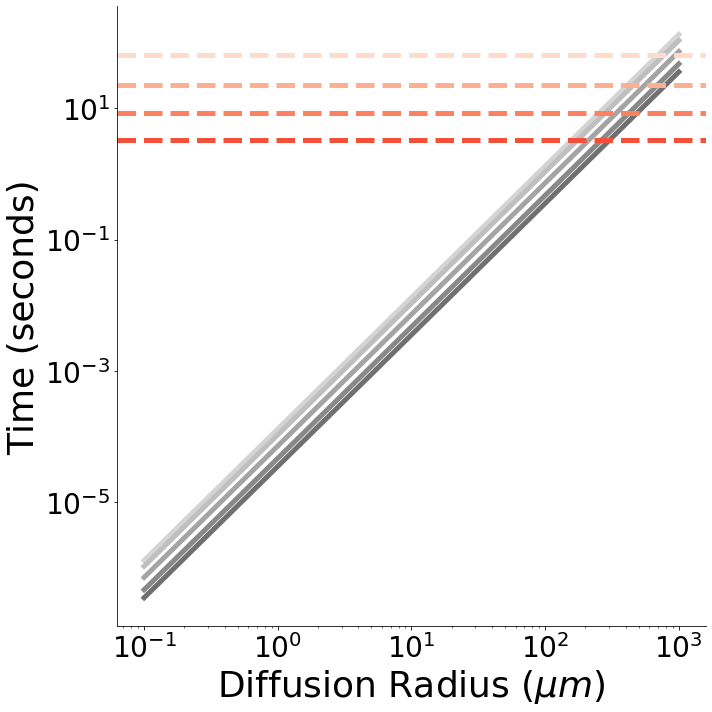

In [5]:
plt.figure(figsize=(10,10))
plt.xscale('log')
plt.yscale('log')

#plt.plot(R, ts, lw=5, c='k')

pal = sns.color_palette('Greys', n_colors=10)
for i, T in enumerate(T_C):
    plt.plot(M_R[i,:], ts[i,:], color=pal[i+2], label=T, lw=5)

pal = sns.color_palette('Reds')
for i, T in enumerate(temps):
    c = pal[i]
    plt.axhline(t_halfs[i], color=c, ls='--', lw=5, label=(T-273.15))


plt.xlabel('Diffusion Radius ($\mu m$)', fontsize=36)
plt.ylabel('Time (seconds)', fontsize=36)
plt.xticks(fontsize=28)
plt.yticks(fontsize=28)
#plt.legend()

sns.despine()
plt.tight_layout()
plt.savefig('Fig1D_diffusion.png')

plt.show()

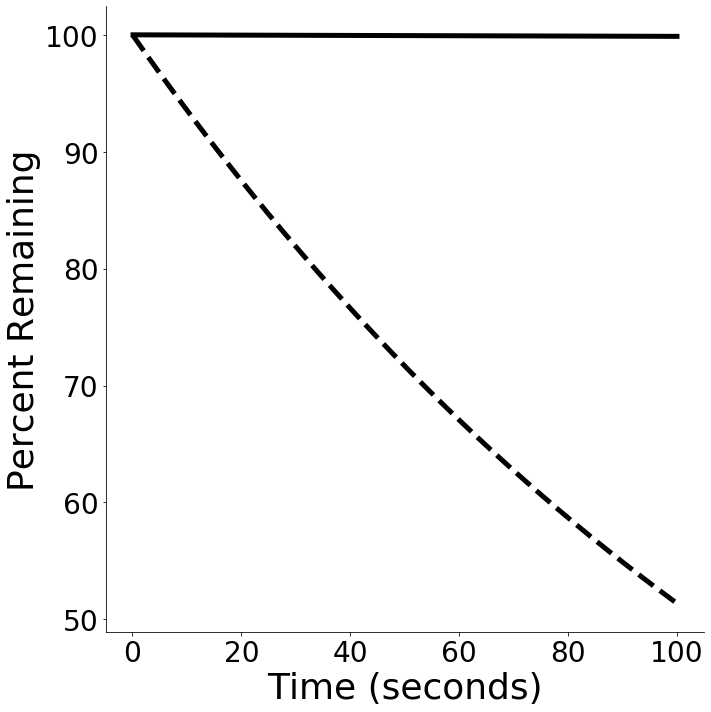

In [6]:
# Here we are assuming that there is a disequilibrium to start with (e.g. 100% bicarb) so that the fraction 
# remaining follows a single-exponential decay. This is not exactly right because over time product accumulates,
# but the figure communicates the main point. 
# Spontaneous HCO3- dehydration calculated according Gutknecht paper.
# Catalyzed HCO3- dehydration calculated by rounding csosCA in-vitro dehydration kcat (~9e4 /s). 
# Data from Heinhorst et al. JBac 2006.
T = 298.15
kd_eff_spont = k_d(T)  # /s units
kd_eff_cat = 1e5       # /s units
kOAA = k_OAA_decarb(T)

ts = np.logspace(-1, 2, 1000)
plt.figure(figsize=(10,10))
pal = sns.color_palette('muted')
plt.plot(ts, 100*np.exp(-kd_eff_spont*ts), c='k', ls='--', lw=5)
plt.plot(ts, 100*np.exp(-kOAA*ts), c='k', lw=5)
plt.xlabel('Time (seconds)', fontsize=36)
plt.ylabel('Percent Remaining', fontsize=36)
plt.xticks(fontsize=28)
plt.yticks(fontsize=28)

sns.despine()
plt.tight_layout()
plt.savefig('Fig1E_stability.png')
plt.show()

In [7]:
# Calculate a halftime for oxaloacetate
for T_C in np.arange(10, 51, 10):
    kdecarb = k_OAA_decarb(T_C + 273.15)
    t_half_OAA = np.log(2) / (kdecarb)
    t_half_OAA_hr = t_half_OAA / (60*60)
    print('Temp: %d, t1/2: %.2f min' % (T_C, t_half_OAA_hr))

Temp: 10, t1/2: 111.59 min
Temp: 20, t1/2: 28.22 min
Temp: 30, t1/2: 7.81 min
Temp: 40, t1/2: 2.35 min
Temp: 50, t1/2: 0.76 min
